In [22]:
# 显示图片

import cv2
img = cv2.imread("1.jpg")
cv2.namedWindow("img", cv2.WINDOW_NORMAL)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
# 显示视频

import cv2
frameWidth = 640
frameHeight = 480
cap = cv2.VideoCapture("test.mp4")
while True:
     success, img = cap.read()
     img = cv2.resize(img, (frameWidth, frameHeight))
     cv2.imshow("Result", img)
     if cv2.waitKey(1) & 0xFF == ord('q'):
        break

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


: 

In [10]:
# 灰度图、模糊图片、提取边缘、边缘膨胀、边缘细化

import cv2
import numpy as np
img = cv2.imread("1.jpg")

imgRGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # BGR2RGB
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.blur(img, (3, 3)) # 均值滤波
median = cv2.medianBlur(img, 5)  # 中值滤波
imgBlur = cv2.GaussianBlur(imgGray,(5,5),0) # 高斯滤波
box1 = cv2.boxFilter(img,-1,(3,3), normalize=True)  # 方框滤波
box2 = cv2.boxFilter(img,-1,(3,3), normalize=False) # 方框滤波

kernel = np.ones((5,5),np.uint8)
imgCanny = cv2.Canny(img,150,200) # Canny边缘检测
imgDialation = cv2.dilate(imgCanny,kernel,iterations=1)
imgEroded = cv2.erode(imgDialation,kernel,iterations=1) # iterations腐蚀次数


cv2.imshow("Gray Image",imgGray)
cv2.imshow("Blur Image",imgBlur)
cv2.imshow("Canny Image",imgCanny)
cv2.imshow("Dialation Image",imgDialation)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [20]:
# 直方图均衡
import cv2
import numpy as np
img = cv2.imread("1.jpg", 0) # 灰度图

# 直方图均衡化（全局），增加立体感
equ = cv2.equalizeHist(img) 

#自适应直方图均衡化
#clipLimit颜色对比度的阈值， titleGridSize进行像素均衡化的网格大小，即在多少网格下进行直方图的均衡化操作
clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
res_clahe=clahe.apply(img)

res=np.hstack((img,equ,res_clahe))

cv2.namedWindow("img", cv2.WINDOW_NORMAL)
cv2.imshow('img', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

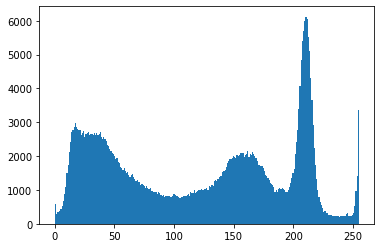

In [2]:
# 灰度图颜色分布
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('1.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist.shape # (256, 1)
plt.hist(img.ravel(),256)
plt.show()

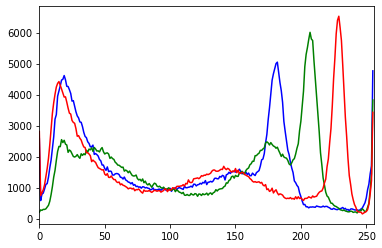

In [7]:
# 彩色通道的分布
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('1.jpg')
color=('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256]) # [img],通道,mask,[histSize],像素值范围
    plt.plot(histr,color=col)
    plt.xlim([0,256]) # x轴的范围

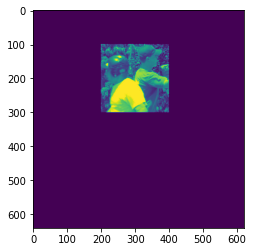

In [4]:
# 创建mask
import numpy as np
import cv2

img = cv2.imread('1.jpg',0)
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300,200:400]=255 # mask部分为1，其余为0
mask_img=cv2.bitwise_and(img,img,mask=mask) #图片之间与操作
plt.imshow(mask_img)

In [ ]:
# 缩放、裁剪
import cv2
img = cv2.imread("1.jpg")
imgResize = cv2.resize(img,(1000,500)) # 缩放
imgCropped = img[46:119,352:495] # 裁剪
 
cv2.imshow("Image Resize",imgResize)
cv2.imshow("Image Cropped",imgCropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 画线、框、圆、写字
import cv2
img = cv2.imread("1.jpg")
 
cv2.line(img,(0,0),(100,100),(0,255,0),3)
cv2.rectangle(img,(0,0),(250,350),(0,0,255),2)
cv2.circle(img,(400,50),30,(255,255,0),5) # center,radius
cv2.putText(img," OPENCV  ",(300,200),cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0),3)
 
cv2.imshow("Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 透视变换（投影映射到新的平面）
import cv2
import numpy as np
 
img = cv2.imread("1.jpg")
width,height = 250,350
pts1 = np.float32([[111,219],[287,188],[154,482],[352,440]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
imgOutput = cv2.warpPerspective(img,matrix,(width,height))
 
cv2.imshow("Image",img)
cv2.imshow("Output",imgOutput)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 图像融合
import cv2
img1=cv2.resize(cv2.imread('1.jpg'), (640, 640))
img2=cv2.resize(cv2.imread('2.jpg'), (640, 640))
res = cv2.addWeighted(img1, 0.4, img2, 0.6, 0) # 按权重融合
cv2.imshow("Output",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# 形态学

import cv2
import numpy as np
img = cv2.imread("1.jpg")
kernel = np.ones((30,30),np.uint8) 

# 腐蚀
erosion_1 = cv2.erode(img,kernel,iterations = 1)
erosion_2 = cv2.erode(img,kernel,iterations = 2)
erosion_3 = cv2.erode(img,kernel,iterations = 3)
res = np.hstack((erosion_1,erosion_2,erosion_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 膨胀
dilate_1 = cv2.dilate(img,kernel,iterations = 1)
dilate_2 = cv2.dilate(img,kernel,iterations = 2)
dilate_3 = cv2.dilate(img,kernel,iterations = 3)
res = np.hstack((dilate_1,dilate_2,dilate_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 梯度=膨胀-腐蚀，将图片的边缘提取出
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
cv2.imshow('gradient', gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

#礼帽:突出了原图像中更亮的局域
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
#黑帽:突出了原图像中更暗的局域
blackhat  = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
res = np.hstack((tophat,blackhat))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 边缘提取
import cv2
import numpy as np
img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)

# Sobel算子提取边缘
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)   
sobely = cv2.convertScaleAbs(sobely)  
sobelxy =  cv2.addWeighted(sobelx,0.5,sobely,0.5,0)  

# Scharr算子提取边缘
scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)   
scharry = cv2.convertScaleAbs(scharry)  
scharrxy =  cv2.addWeighted(scharrx,0.5,scharry,0.5,0) 

# Laplacian算子提取边缘
laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)   

# Canny边缘检测
v1=cv2.Canny(img,80,150) # 最大和最小阈值
v2=cv2.Canny(img,50,100)

# Scharr要比Sobel显示的边缘更加多，而Laplacian就显示的更加少了
res = np.hstack((sobelxy,scharrxy,laplacian,v1,v2))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [16]:
# 提取并绘制轮廓
img = cv2.imread('lena.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) # contours: np.int32()

# 轮廓特征
cnt = contours[0] # 获取第0个轮廓
cv2.contourArea(cnt) # 轮廓面积
cv2.arcLength(cnt,True) # 周长，True表示闭合的

#传入绘制图像，轮廓，轮廓索引，颜色模式，线条厚度
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2) #-1表示显示所有轮廓，123表示第123个轮廓

cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# 填充指定区域
import cv2
import numpy as np

points = [[0.3939208984375, 24.24242401123047], 
          [500.3333129882812, 100.272727966308594], 
          [300.9393920898438, 300.6666564941406], 
          [100.0302734375, 400.6363525390625]]
img = cv2.imread('1.jpg')

out = cv2.fillPoly(img, [np.int32(points)] ,(255, 0, 255)) 
# cv2.imwrite('output.jpg', out)
cv2.namedWindow("img", cv2.WINDOW_NORMAL)
cv2.imshow('img',out)
cv2.waitKey(0)
cv2.destroyAllWindows()

True

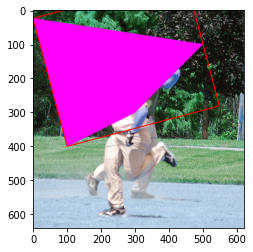

In [4]:
# 算最小面积包围矩形
import cv2
import numpy as np
from matplotlib import pyplot as plt
points = [[0.3939208984375, 24.24242401123047], 
          [500.3333129882812, 100.272727966308594], 
          [300.9393920898438, 300.6666564941406], 
          [100.0302734375, 400.6363525390625]]
img = cv2.imread('1.jpg')

min_rect = cv2.minAreaRect(np.float32(points)) # 最小面积包围矩形
rect_points = cv2.boxPoints(min_rect) # 得到四个角点
out = cv2.fillPoly(img, [np.int32(points)] ,(255, 0, 255))
cv2.drawContours(out, [np.int32(rect_points)], 0, (255,0,0), 2) # 给定点画多边形
plt.imshow(out)

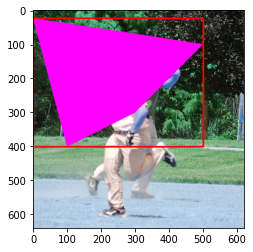

In [1]:
# 算外接矩形
import cv2
import numpy as np
from matplotlib import pyplot as plt

points = [[0.3939208984375, 24.24242401123047], 
          [500.3333129882812, 100.272727966308594], 
          [300.9393920898438, 300.6666564941406], 
          [100.0302734375, 400.6363525390625]]
img = cv2.imread('1.jpg')

x,y,w,h = cv2.boundingRect(np.float32(points)) # 外接矩形,无旋转
out = cv2.fillPoly(img, [np.int32(points)] ,(255, 0, 255))
cv2.rectangle(out,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(out)

In [7]:
# https://blog.csdn.net/weixin_43229348/article/details/125986969
import cv2
def rotateImg(img, theta, color):
    """
    :param img: 图片位置
    :param theta: 旋转角度，顺时针为负
    :param color: BGR三色
    :return:将图片上点包围的区域涂上颜色
    """
    img = cv2.imread(img)
    height, width = img.shape[:2]  # 图片的高度和宽度
    x0, y0 = width//2, height//2  # 以图像中心作为旋转中心
    MAR = cv2.getRotationMatrix2D((x0,y0), theta, 1.0) # 获得旋转矩阵, 
    imgR = cv2.warpAffine(img, MAR, (width, height), borderValue=color)  # 旋转变换，默认为黑色填充
    return imgR

img = '1.jpg'
color = (255,255,255)
theta = -80
imgR = rotateImg(img, theta, color)
cv2.imwrite('output.jpg', imgR)

True

In [8]:
# 画框
point = [[0,0], [100,0],[100,500], [0,500]]
point = np.int32(point).tolist()
img = cv2.imread("1.jpg")
color=(255, 0, 0)
thickness=2
cv2.line(img, tuple(point[0]), tuple(point[1]), color, thickness)
cv2.line(img, tuple(point[1]), tuple(point[2]), color, thickness)
cv2.line(img, tuple(point[2]), tuple(point[3]), color, thickness)
cv2.line(img, tuple(point[3]), tuple(point[0]), color, thickness)
cv2.imwrite('output.jpg', img)

True

In [29]:
# https://blog.csdn.net/weixin_43229348/article/details/125986969
import cv2
import numpy as np
points = [[630.3939208984375, 24.24242401123047], [674.3333129882812, 27.272727966308594], [684.9393920898438, 416.6666564941406], [644.0302734375, 413.6363525390625]]
box = cv2.minAreaRect(np.float32(points)) # 最小面积矩形，返回box = (中心(x,y)，（宽度、高度）、旋转角度)
rect_points  = cv2.boxPoints(box) # 返回4个角点,以y最大（y相同则选靠右的）的点作为起点，顺时针排序。旋转角度是点0和点3之间连线与x轴正方向的夹角

In [15]:
# 图像金字塔
import cv2

img=cv2.imread("lena.png")
up=cv2.pyrUp(img) # 上采样，图像变大
down=cv2.pyrDown(img) # 下采样，图像变小
print(img.shape,up.shape,down.shape)


(512, 512, 3) (1024, 1024, 3) (256, 256, 3)


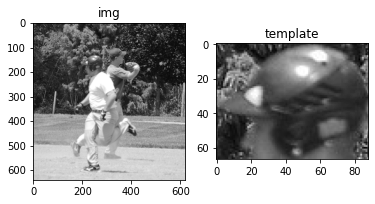

(574, 534)
574 534


In [21]:
# 模板匹配(从图中找出指定区域)
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('1.jpg', 0)
template = cv2.imread('3.jpg', 0)
img_h, img_w = img.shape
tem_h, tem_w = template.shape
plt.subplot(121),plt.imshow(img,'gray'),plt.title("img")
plt.subplot(122),plt.imshow(template,'gray'),plt.title("template")
plt.show()

res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
print(res.shape) # (img_h-tem_h+1, img_w-tem_w+1)
print(img_h-tem_h+1, img_w-tem_w+1)

# TM_SQDIFF：计算平方不同，计算出来的值越小，越相关
# TM_CCORR：计算相关性，计算出来的值越大，越相关
# TM_CCOEFF：计算相关系数，计算出来的值越大，越相关
# TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关
# TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关
# TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关

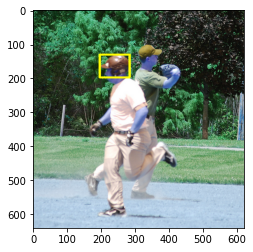

In [24]:
img_rgb = cv2.imread('1.jpg')
threshold=0.8
loc=np.where(res>=threshold) # 画出找到的区域(y,x)
for pt in zip(*loc[::-1]): # 调整为(x,y)并拼成坐标
    bottom_right=(pt[0]+tem_w,pt[1]+tem_h)
    cv2.rectangle(img_rgb,pt,bottom_right,(255,255,0),2) # 很多个矩形叠在一起
plt.imshow(img_rgb)

不规则裁剪：https://blog.csdn.net/weixin_42228166/article/details/123856823
opencv操作：https://blog.csdn.net/weixin_44378835/article/details/124795205

In [16]:
dic = json.dumps(dict1,ensure_ascii=False)

percent = 3
seed = np.random.randint(1,9,percent)
print(seed)

[5 8 6]


In [ ]:
# -*- coding: UTF-8 -*-
"""显示目录树状图"""
import os

# site存储出现转折的层级号
site = []
def generate_file_tree_global(path, depth):
    """
    递归打印文件目录树状图（使用全局变量）
    
    :param path: 根目录路径
    :param depth: 根目录、文件所在的层级号
    :return: None
    """
    global site
    filenames_list = os.listdir(path)
    if len(filenames_list) < 1:
        return
    # 本级目录最后一个文件名
    last_filename = filenames_list[-1]

    for item in filenames_list:
        string_list = ["│   " for _ in range(depth - site.__len__())]
        for s in site:
            string_list.insert(s, "    ")

        if item != last_filename:
            string_list.append("├── ")
        else:
            # 本级目录最后一个文件名，即为转折处
            string_list.append("└── ")
            # 添加当前出现转折的层级号
            site.append(depth)

        print("".join(string_list) + item)

        new_path = path + '/' + item
        if os.path.isdir(new_path):
            generate_file_tree_global(new_path, depth + 1)
        if item == last_filename:
            # 结束本级目录搜索时，回收（移除）当前的转折层级号
            site.pop()


if __name__ == '__main__':
    # root_path = input("请输入根目录路径：")
    root_path = "home/"
    print(os.path.abspath(root_path))
    generate_file_tree_global(root_path, depth=0)